# Decision Tree
- 분류와 회귀문제 모두 사용가능
- 트리의 루트에서 시작해 정보 이득(IG, Integration Gain)이 최대가 되는 특성으로 데이터 분할 후 분기 선택 (=> 정보량 개념 사용)
    - 정보량
        - 당연한 사실일수록 정보의 가치는 낮다
        - **불확실성**이 높을수록 정보량이 많아짐
        - 따라서, 정보량은 **발생 확률에 반비례**
        - 정보량
    \begin{align}
    I(E) = log_2(\frac{1}{P(E)}) = -log_2(P(E))
    \end{align}

- **``불순도(impurity), 불확실성이 더 크게 감소하는 쪽으로 분기 선택``**
- 지표들: Entropy, Gini index, classification error 사용
    - ``Entropy`` (평균 정보량)
        - $ I_H = -ΣP\log_2P$
        - 2개의 사건이 0.5, 0.5의 발생확률이면 엔트로피는 최대인 1 => 불확실성이 가장 높음
    - ``Gini index`` (지니계수)
        - $I_G = ΣP(1-P) = 1 - ΣP^2$
        - 사건들의 확률이 같을때 최대 => 0.5
- 각 feature가 개별 처리되기 때문에 데이터 스케일에 영향을 받지 않아 **특성의 정규화나 표준화가 필요 없음**

## 직접구현

In [1]:
### Decision Tree 구현
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


# iris 데이터 읽어오기
iris = load_iris()

# 데이터 분류
x_train = iris['data'][:,0]
y_train = iris['target']
# plt.scatter(x_train, y_train);

# DataFrame 만들기
df = pd.DataFrame(data=np.c_[x_train, y_train], columns=['data', 'target'])
df = df.astype({'target':'int'})
df.head()
df

# div라는 분기후보들의 리스트 생성
x_range = list(set(x_train))
x_range.sort()
div = [(x_range[i]+x_range[i+1]) / 2 for i in range(len(x_range)-1)]


# div에 있는 분기후보들 각각의 Gini index를 찾아줌
gini = []
for i in div:
  left = df[df['data'] < i]['target'].to_numpy().astype('int')
  right = df[df['data'] > i]['target'].to_numpy().astype('int')
  G_L = 1
  G_R = 1
  for j in np.bincount(left):
    G_L -= (j/len(left))**2
  for k in np.bincount(right):
    G_R -= (k/len(right))**2

  weighted_G = G_L*(len(left)/(len(left)+len(right))) + G_R*(len(right)/(len(left)+len(right)))
  gini.append(weighted_G)

# Root의 Gini index 계산
root_G = 1 - (len(df[df['target']==0.0])/len(y_train))**2 - (len(df[df['target']==1.0])/len(y_train))**2 - (len(df[df['target']==2.0])/len(y_train))**2

# Information gain 계산
IG = []
for i in gini:
  IG.append(root_G - i)

# IG중 가장 큰값 찾은 후 해당분기 프린트 (***gini index가 가장 작은 값을 찾아도 됨***)
print('Information gain의 최댓값의 인덱스:', IG.index(max(IG)))
print('최적의 분기가 되는 point:', div[11])

Information gain의 최댓값의 인덱스: 11
최적의 분기가 되는 point: 5.45


## sklearn 이용해 구현

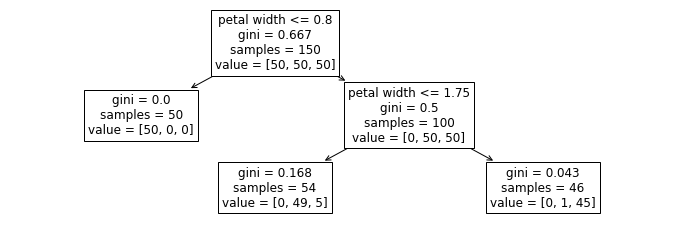

In [2]:
# sklearn 이용해 간단하게 작성
import numpy as np
import pandas as pd
import matplotlib
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_iris


# iris 데이터 읽어오기
iris = load_iris()

# DataFrame 만들기
# 처음엔 sepal length만 갖고 모델링
# df = pd.DataFrame(data=np.c_[iris['data'][:,0], iris['target']], columns=['data', 'target'])
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

# data 생성
x_train = np.array(df.iloc[:, :-1]).reshape(-1,4)    # 훈련데이터를 (150, 1)로 reshape
y_train = df['target']

# Decision Tree 객체생성
# 첫번째 최적의 분기만 확인하려면 max_depth = 1로 설정
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_train, y_train)

# 결과 확인
plt.figure(figsize=(12, 4))
tree.plot_tree(dt, feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width'], fontsize=12)   # dt plot을 그려줌
plt.show()

# 결과를 보면
# 1. 분기를 나눈 feature 이름
# 2. gini 계수 
# 3. sample의 개수
# 4. value : target에 해당하는 sample 개수들

## for문을 이용해 optimal depth 찾기

[0.6333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]
[0.675, 0.9666666666666667, 0.975, 0.9916666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


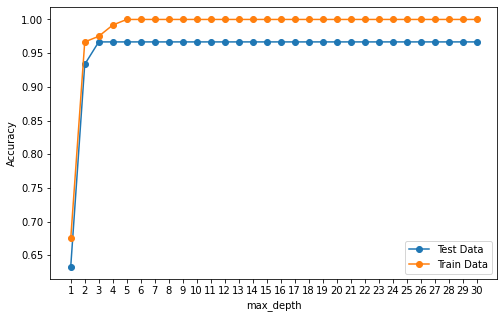

optimal depth = 3, accuracy = 0.967


In [3]:
# 최적의 depth 찾기
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# data 읽어오기
iris = load_iris()

# dataset 생성
x_train, x_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2)

# max_depth = 30으로 설정하고 최적의 depth찾기
max_depth = 30
acc_test = []
acc_train = []
for i in range(1, max_depth+1):       # 분기가 1이상이여야 하기 때문에 1부터 시작
  # DT로 데이터 학습
  dt = DecisionTreeClassifier(max_depth=i)   
  dt.fit(x_train, y_train)

  y_pred = dt.predict(x_test)
  acc_test.append((y_test == y_pred).mean())

  y_pred = dt.predict(x_train)
  acc_train.append((y_train == y_pred).mean())

  # 아래처럼해도 된다.
  # acc_test.append(dt.score(x_test, y_test))
  # acc_train.append(dt.score(x_train, y_train))

print(acc_test)
print(acc_train)

# plt으로 시각화
plt.figure(figsize=(8, 5))
plt.plot(acc_test, marker='o', label="Test Data")
plt.plot(acc_train, marker='o', label="Train Data")
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.xticks(np.arange(max_depth), np.arange(1, max_depth + 1))
plt.show()

opt_depth = np.argmax(acc_test)
opt_acc = acc_test[opt_depth]

print("optimal depth = {}, accuracy = {:.3f}".format(opt_depth + 1, opt_acc))

In [4]:
# 당뇨병 환자 데이터를 읽어와 KNN, DT를 이용해서 예측해보고 결과 비교하기
# 캐글 Diabetes Dataset 링크
# https://www.kaggle.com/datasets/mathchi/diabetes-data-set?resource=download

import pandas as pd

df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data = df.to_numpy()[:, :-1]
target = df['Outcome'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [6]:
# max_depth 1~20까지 중에 정확도가 가장 큰 depth 찾기
max_dep = 20
acc_test = []
acc_train = []

for i in range(1, max_dep+1):
  # DT 객체 생성 후 훈련
  dt = DecisionTreeClassifier(max_depth=i)
  dt.fit(x_train, y_train)

  acc_test.append(dt.score(x_test, y_test))
  acc_train.append(dt.score(x_train, y_train))

opt_depth = np.argmax(acc_test)
opt_acc = acc_test[opt_depth]

print("optimal depth = {}, accuracy = {:.3f}".format(opt_depth + 1, opt_acc))

# opt_depth로 최종모델 생성
model = DecisionTreeClassifier(max_depth=opt_depth)

# new data 테스트
new_data = [3., 127., 85., 25., 473., 27., 0.5, 37.]
d = np.array(new_data).reshape(1, -1)

y_hat = dt.predict(d)
print(f'x = [3., 127., 85., 25., 473., 27., 0.5, 37.] --> prediction y:{y_hat[0]}')     # {y_hat[0]}

optimal depth = 1, accuracy = 0.740
x = [3., 127., 85., 25., 473., 27., 0.5, 37.] --> prediction y:0
